In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import ast
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import seaborn as sns
%matplotlib inline

In [4]:
raw_data = pd.read_csv('/home/lim/dev_ws/eda/ros_eda_project/data/movie_genre_data.csv')
raw_data.head()

,Unnamed: 0,Name,Year,Genre,Viewers
0,0,7번방의 선물,2013,"['코미디', '드라마']","12,811,206"
1,1,설국열차,2013,"['SF', '액션']","9,349,993"
2,2,관상,2013,"['사극', '드라마']","9,134,238"
3,3,아이언맨 3,2013,"['액션', '어드벤처', 'SF']","9,001,331"
4,4,베를린,2013,['액션'],"7,166,290"


In [5]:
raw_data = raw_data.drop("Unnamed: 0", axis=1)
raw_data.head()

,Name,Year,Genre,Viewers
0,7번방의 선물,2013,"['코미디', '드라마']","12,811,206"
1,설국열차,2013,"['SF', '액션']","9,349,993"
2,관상,2013,"['사극', '드라마']","9,134,238"
3,아이언맨 3,2013,"['액션', '어드벤처', 'SF']","9,001,331"
4,베를린,2013,['액션'],"7,166,290"


In [6]:
raw_data = raw_data[["Year", "Name", "Genre", "Viewers"]]
raw_data.head()

,Year,Name,Genre,Viewers
0,2013,7번방의 선물,"['코미디', '드라마']","12,811,206"
1,2013,설국열차,"['SF', '액션']","9,349,993"
2,2013,관상,"['사극', '드라마']","9,134,238"
3,2013,아이언맨 3,"['액션', '어드벤처', 'SF']","9,001,331"
4,2013,베를린,['액션'],"7,166,290"


In [7]:
years = raw_data["Year"].unique()
years

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024])

In [9]:
befOTT = raw_data[(raw_data["Year"] >= 2014) & (raw_data["Year"] <= 2018)]
befOTT.head()

,Year,Name,Genre,Viewers
50,2014,명량,"['사극', '액션']","17,613,682"
51,2014,겨울왕국,"['애니메이션', '어드벤처', '코미디', '뮤지컬', '판타지']","10,296,101"
52,2014,인터스텔라,['SF'],"10,105,247"
53,2014,해적: 바다로 간 산적,['어드벤처'],"8,666,046"
54,2014,수상한 그녀,['드라마'],"8,657,982"


In [10]:
aftOTT = raw_data[(raw_data["Year"] >= 2019) & (raw_data["Year"] <= 2023)]
aftOTT.head()

,Year,Name,Genre,Viewers
300,2019,극한직업,['코미디'],"16,265,618"
301,2019,어벤져스: 엔드게임,"['액션', 'SF']","13,934,399"
302,2019,겨울왕국 2,['애니메이션'],"13,369,064"
303,2019,알라딘,"['어드벤처', '판타지']","12,552,283"
304,2019,기생충,['드라마'],"10,085,275"


In [11]:
befOTT.tail()

,Year,Name,Genre,Viewers
295,2018,사라진 밤,['스릴러'],"1,315,726"
296,2018,스윙키즈,['드라마'],"1,258,811"
297,2018,바람 바람 바람,['코미디'],"1,194,229"
298,2018,PMC: 더 벙커,['액션'],"1,179,031"
299,2018,범블비,"['액션', '어드벤처', 'SF']","1,167,150"


In [12]:
genres = ['미스터리', '공포(호러)', '액션', '범죄', '판타지', '드라마', 'SF', '다큐멘터리', '전쟁','코미디', '뮤지컬', '애니메이션', '스릴러', '어드벤처', '사극', '멜로/로맨스', '기타']

In [48]:
movie_genres = ['Mystery', 'Horror', 'Action', 'Crime', 'Fantasy', 'Drama', 'Sci-Fi', 'Documentary', 'War', 'Comedy', 'Musical', 'Animation', 'Thriller', 'Adventure', 'Historical Drama', 'Romance', 'Other']

In [128]:
genre_count_bef_eng = {
    'Historical': 14,
    'Action': 109,
    'Animation': 18,
    'Adventure': 55,
    'Comedy': 39,
    'Musical': 4,
    'Fantasy': 28,
    'Sci-Fi': 37,
    'Drama': 91,
    'Thriller': 42,
    'Documentary': 2,
    'Crime': 38,
    'Melodrama/Romance': 14,
    'Mystery': 9,
    'War': 5,
    'Horror': 6
}

In [129]:
all_genres_bef = befOTT["Genre"].explode()

genre_count_bef = Counter(all_genres_bef)
genre_num_befOTT = dict(genre_count_bef)
genre_num_befOTT

{'사극': 14,
 '액션': 109,
 '애니메이션': 18,
 '어드벤처': 55,
 '코미디': 39,
 '뮤지컬': 4,
 '판타지': 28,
 'SF': 37,
 '드라마': 91,
 '스릴러': 42,
 '다큐멘터리': 2,
 '범죄': 38,
 '멜로/로맨스': 14,
 '미스터리': 9,
 '전쟁': 5,
 '공포(호러)': 6}

In [151]:
all_genres_bef

50        사극
50        액션
51     애니메이션
51      어드벤처
51       코미디
       ...  
297      코미디
298       액션
299       액션
299     어드벤처
299       SF
Name: Genre, Length: 511, dtype: object

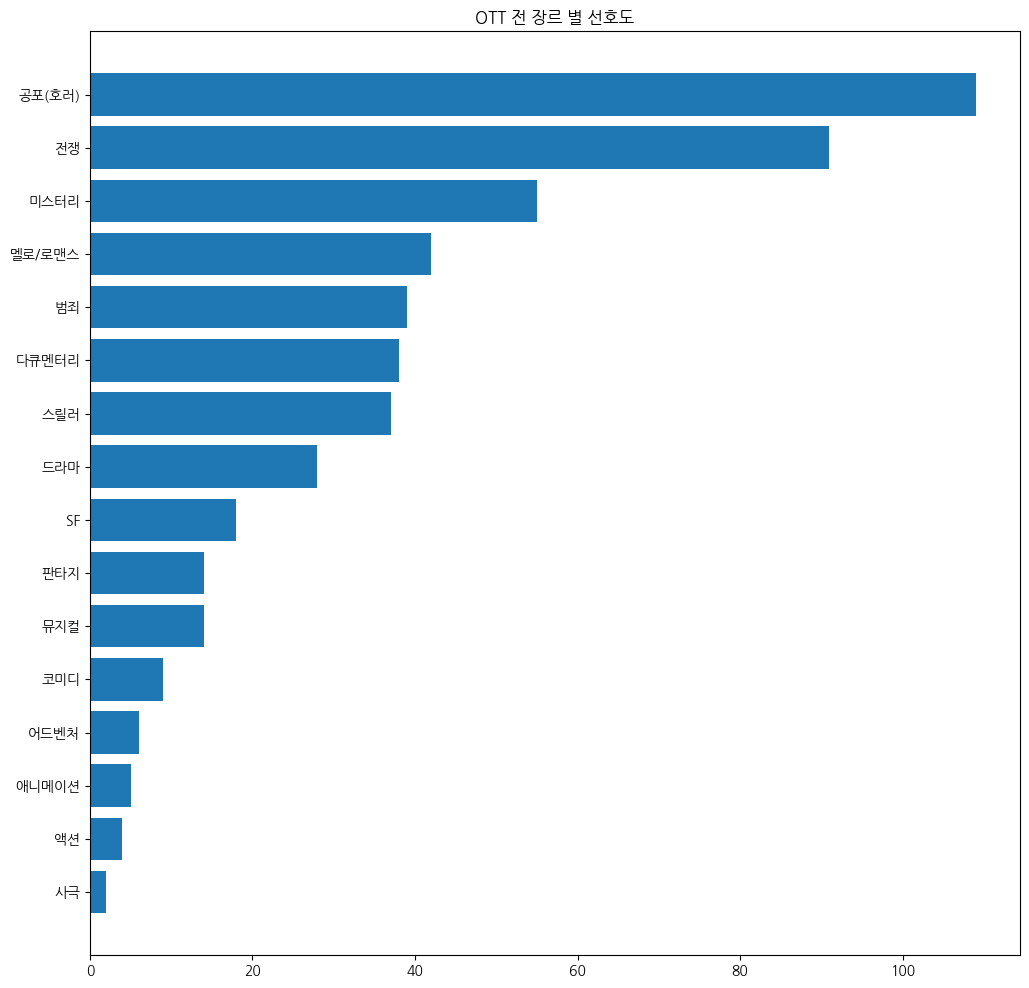

In [149]:
sorted_genre_num_befOTT = dict(sorted(genre_num_befOTT.items(), key=lambda x: x[1]))

plt.figure(figsize=(12, 12))               # 이미지 사이즈를 설정하고 이미지 생성
y_height = range(0, len(sorted_genre_num_befOTT))       # y축 높이 지정
plt.barh(y_height, sorted_genre_num_befOTT.values())     # 수평막대 그리기
plt.title("OTT 전 장르 별 선호도")      #  차트 제목 설정
plt.yticks(y_height, genre_num_befOTT.keys()) 
plt.savefig('bef_graph.png')
plt.show()

In [131]:
genre_count_bef.update(genre_count_bef_eng)

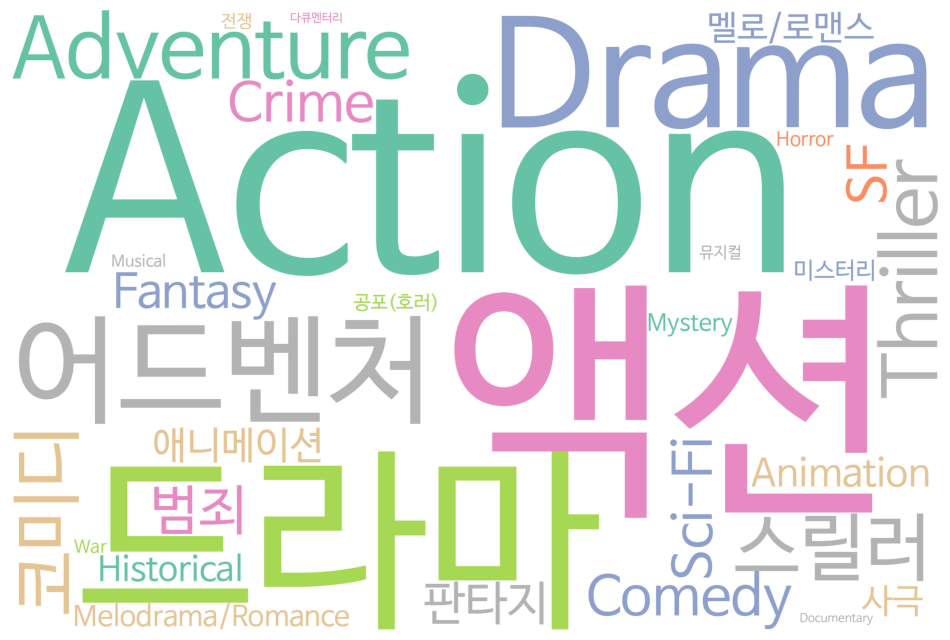

In [132]:
wc= WordCloud(width = 3000, height = 2000, random_state=1, 
              background_color='white', colormap='Set2', 
              collocations=False, stopwords = STOPWORDS,
              font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(genre_count_bef)    # 빈도수가 구해진 전체 단어plt.

# pyplot을 이용해 시각화
plt.figure(figsize=(12, 12))
plt.imshow(wc)
plt.axis("off")
plt.savefig('bef_word_cloud.png')
plt.show()

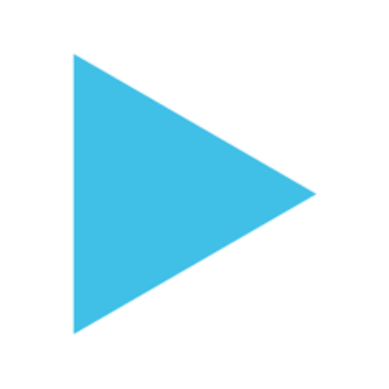

In [133]:
icon = Image.open('/home/lim/dev_ws/eda/ros_eda_project/data/file.png')

# Ensure the image has an alpha channel
icon = icon.convert("RGBA")

# Create a white background image
mask = Image.new("RGBA", icon.size, (255, 255, 255, 255))

# Paste the icon onto the white background
mask.paste(icon, (0, 0), icon)

# Convert to a NumPy array
mask = np.array(mask)

# Display the processed mask
plt.imshow(mask)
plt.axis("off")
plt.show()

In [134]:
import os

# Check if the font exists at a specified location
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
if os.path.exists(font_path):
    print(f"Font found at: {font_path}")
else:
    print("Font not found.")

Font found at: /usr/share/fonts/truetype/nanum/NanumGothic.ttf


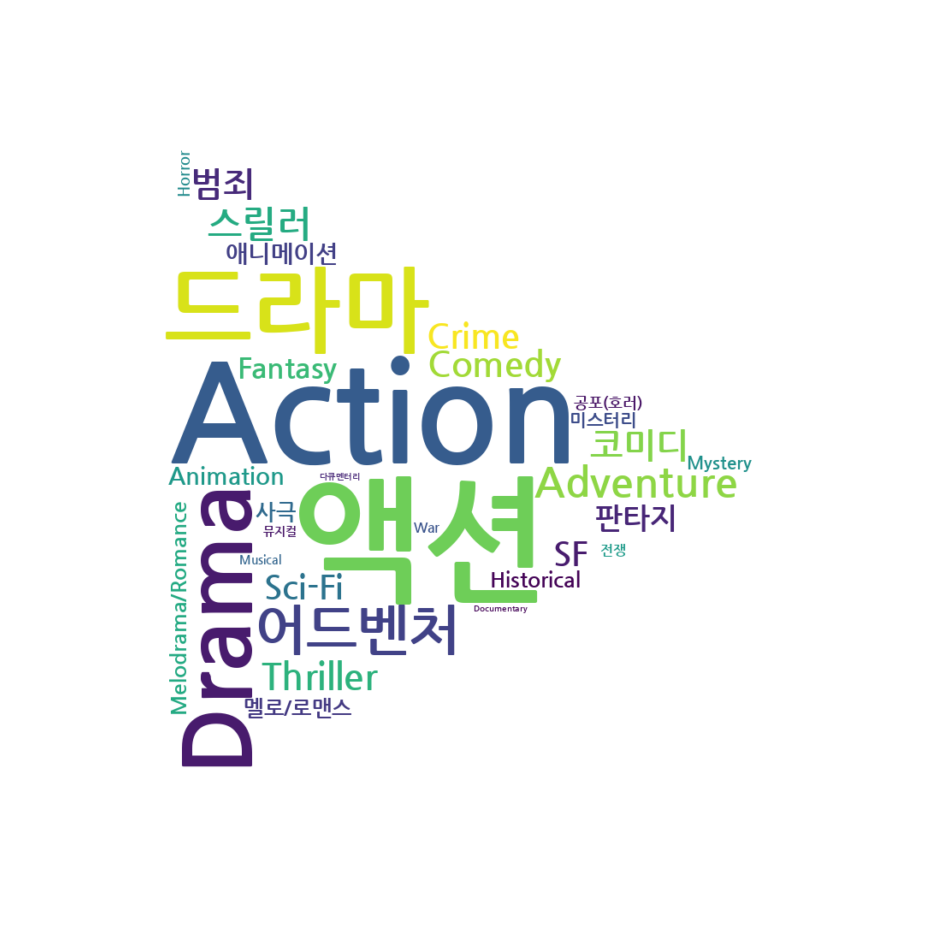

In [135]:
icon = Image.open('/home/lim/dev_ws/eda/ros_eda_project/data/file.png')

# Convert the Image object to grayscale and then to a NumPy array
mask = np.array(icon.convert("L"))  # Convert to grayscale and array

# Define the WordCloud object
wc = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',  # Path to the font
    background_color='white',  # Background color
    width=200,
    height=200,
    max_words=200,
    mask=mask  # Provide the NumPy array mask
)

# Generate the word cloud using a frequency dictionary (replace `data` with your actual dictionary)
cloud = wc.generate_from_frequencies(genre_count_bef)

# Plot the word cloud
plt.figure(figsize=(12, 12))
plt.axis('off')  # Turn off axis
plt.imshow(cloud, interpolation="bilinear")
plt.savefig('bef_graph_play.png')
plt.show()

In [136]:
all_genres_aft = aftOTT["Genre"].explode()

genre_count_aft = Counter(all_genres_aft)
genre_num_aftOTT = dict(genre_count_aft)
genre_num_aftOTT

{'코미디': 41,
 '액션': 102,
 'SF': 21,
 '애니메이션': 38,
 '어드벤처': 48,
 '판타지': 19,
 '드라마': 83,
 '스릴러': 29,
 '사극': 4,
 '범죄': 28,
 '멜로/로맨스': 14,
 '미스터리': 13,
 '공포(호러)': 9,
 '전쟁': 2,
 '뮤지컬': 5,
 '기타': 2}

In [137]:
genre_count_aft_eng = {
    'Comedy': 41,
    'Action': 102,
    'Sci-Fi': 21,
    'Animation': 38,
    'Adventure': 48,
    'Fantasy': 19,
    'Drama': 83,
    'Thriller': 29,
    'Historical': 4,
    'Crime': 28,
    'Melodrama/Romance': 14,
    'Mystery': 13,
    'Horror': 9,
    'War': 2,
    'Musical': 5,
    'Others': 2
}

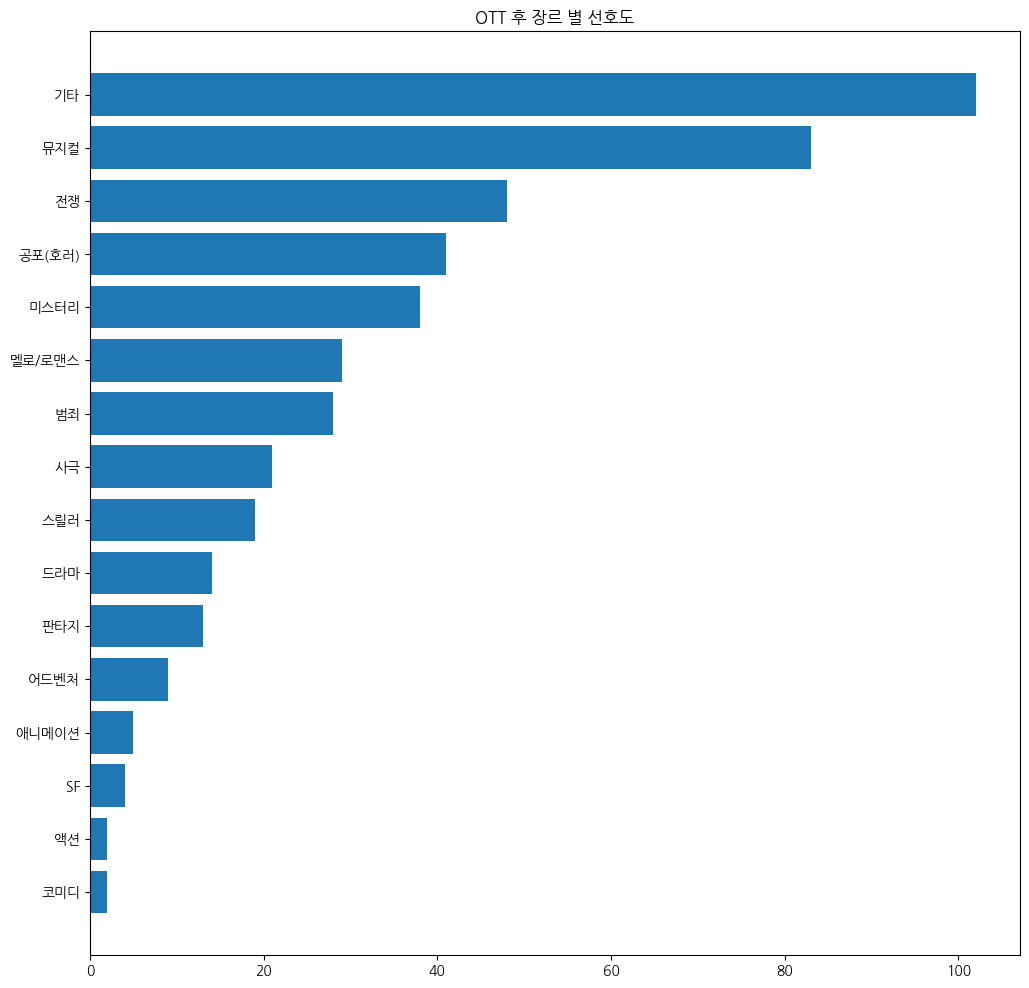

In [150]:
sorted_genre_num_aftOTT = dict(sorted(genre_num_aftOTT.items(), key=lambda x: x[1]))

plt.figure(figsize=(12, 12))               # 이미지 사이즈를 설정하고 이미지 생성
y_height = range(0, len(sorted_genre_num_aftOTT))       # y축 높이 지정
plt.barh(y_height, sorted_genre_num_aftOTT.values())     # 수평막대 그리기
plt.title("OTT 후 장르 별 선호도")      #  차트 제목 설정
plt.yticks(y_height, genre_num_aftOTT.keys()) 
plt.savefig('aft_graph.png')
plt.show()

In [142]:
genre_count_aft.update(genre_count_aft_eng)

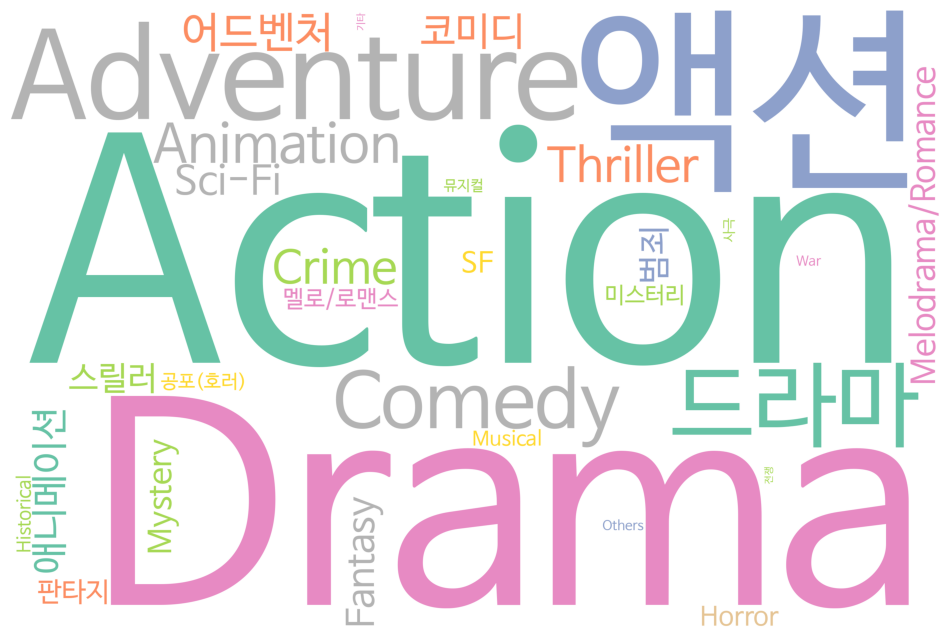

In [145]:
wc= WordCloud(width = 3000, height = 2000, random_state=1, 
              background_color='white', colormap='Set2', 
              collocations=False, stopwords = STOPWORDS,
              font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(genre_count_aft)    # 빈도수가 구해진 전체 단어plt.

# pyplot을 이용해 시각화
plt.figure(figsize=(12, 12))
plt.imshow(wc)
plt.axis("off")
plt.savefig('aft_word_cloud.png')
plt.show()

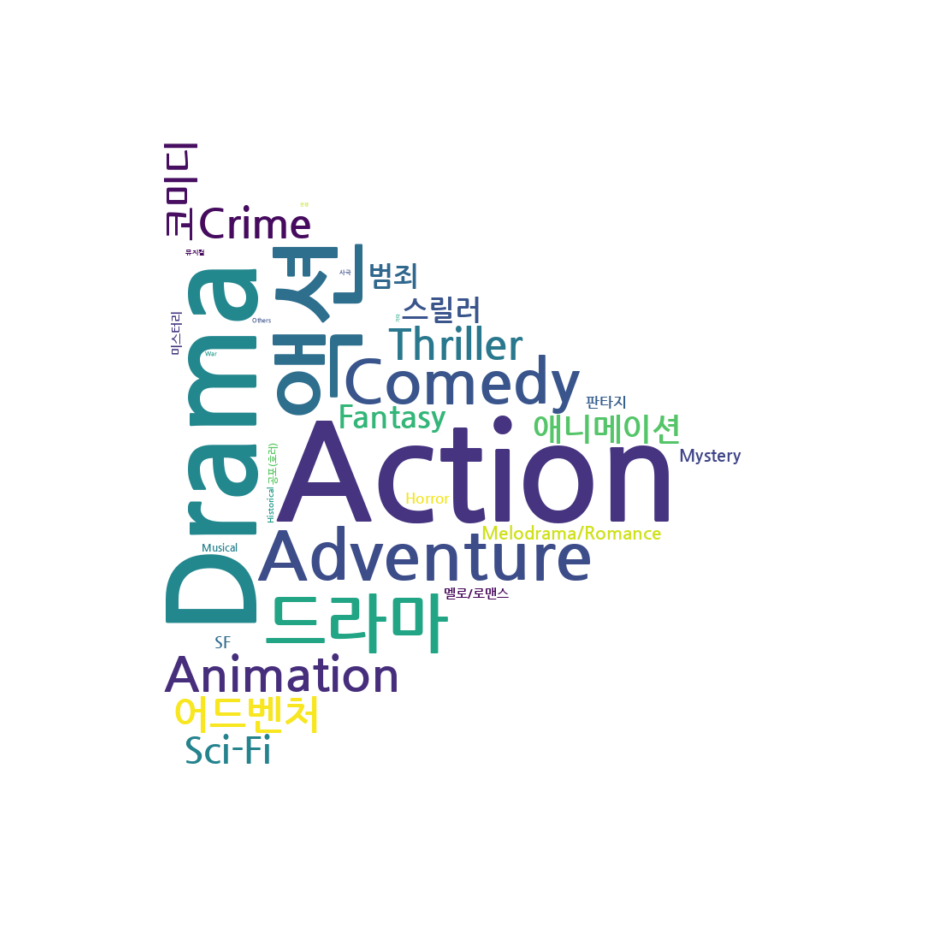

In [148]:
icon = Image.open('/home/lim/dev_ws/eda/ros_eda_project/data/file.png')

# Convert the Image object to grayscale and then to a NumPy array
mask = np.array(icon.convert("L"))  # Convert to grayscale and array

# Define the WordCloud object
wc = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',  # Path to the font
    background_color='white',  # Background color
    width=200,
    height=200,
    max_words=200,
    mask=mask  # Provide the NumPy array mask
)

# Generate the word cloud using a frequency dictionary (replace `data` with your actual dictionary)
cloud = wc.generate_from_frequencies(genre_count_aft)

# Plot the word cloud
plt.figure(figsize=(12, 12))
plt.axis('off')  # Turn off axis
plt.imshow(cloud, interpolation="bilinear")
plt.savefig('aft_graph_play.png')
plt.show()

In [13]:
numOfGenreBefOTT = []

befOTT["Genre"] = befOTT["Genre"].apply(ast.literal_eval)
all_genres = befOTT["Genre"].explode()


for genre in genres:
    count = all_genres[all_genres == genre].count()
    count = count/5
    numOfGenreBefOTT.append(count)

data = {"Genre" : genres, "Number" : numOfGenreBefOTT}
num_of_genre_bef_ott = pd.DataFrame(data)
num_of_genre_bef_ott

/tmp/ipykernel_4826/3986166243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  befOTT["Genre"] = befOTT["Genre"].apply(ast.literal_eval)


,Genre,Number
0,미스터리,1.8
1,공포(호러),1.2
2,액션,21.8
3,범죄,7.6
4,판타지,5.6
5,드라마,18.2
6,SF,7.4
7,다큐멘터리,0.4
8,전쟁,1.0
9,코미디,7.8


In [14]:
numOfGenreAftOTT = []

aftOTT["Genre"] = aftOTT["Genre"].apply(ast.literal_eval)
all_genres = aftOTT["Genre"].explode()


for genre in genres:
    count = all_genres[all_genres == genre].count()
    count = count/5
    numOfGenreAftOTT.append(count)

data = {"Genre" : genres, "Number" : numOfGenreAftOTT}
num_of_genre_aft_ott = pd.DataFrame(data)
num_of_genre_aft_ott

/tmp/ipykernel_4826/1380630908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aftOTT["Genre"] = aftOTT["Genre"].apply(ast.literal_eval)


,Genre,Number
0,미스터리,2.6
1,공포(호러),1.8
2,액션,20.4
3,범죄,5.6
4,판타지,3.8
5,드라마,16.6
6,SF,4.2
7,다큐멘터리,0.0
8,전쟁,0.4
9,코미디,8.2


In [15]:
avg_num_genre = num_of_genre_bef_ott
avg_num_genre.rename(columns={"Genre":"Genre", "Number":"Before OTT Avg"}, inplace=True)
avg_num_genre["After OTT Avg"] = num_of_genre_aft_ott["Number"]
avg_num_genre

,Genre,Before OTT Avg,After OTT Avg
0,미스터리,1.8,2.6
1,공포(호러),1.2,1.8
2,액션,21.8,20.4
3,범죄,7.6,5.6
4,판타지,5.6,3.8
5,드라마,18.2,16.6
6,SF,7.4,4.2
7,다큐멘터리,0.4,0.0
8,전쟁,1.0,0.4
9,코미디,7.8,8.2


In [16]:
df_melted = avg_num_genre.melt(id_vars=["Genre"], var_name="Time Period", value_name="Average")
df_melted

,Genre,Time Period,Average
0,미스터리,Before OTT Avg,1.8
1,공포(호러),Before OTT Avg,1.2
2,액션,Before OTT Avg,21.8
3,범죄,Before OTT Avg,7.6
4,판타지,Before OTT Avg,5.6
5,드라마,Before OTT Avg,18.2
6,SF,Before OTT Avg,7.4
7,다큐멘터리,Before OTT Avg,0.4
8,전쟁,Before OTT Avg,1.0
9,코미디,Before OTT Avg,7.8


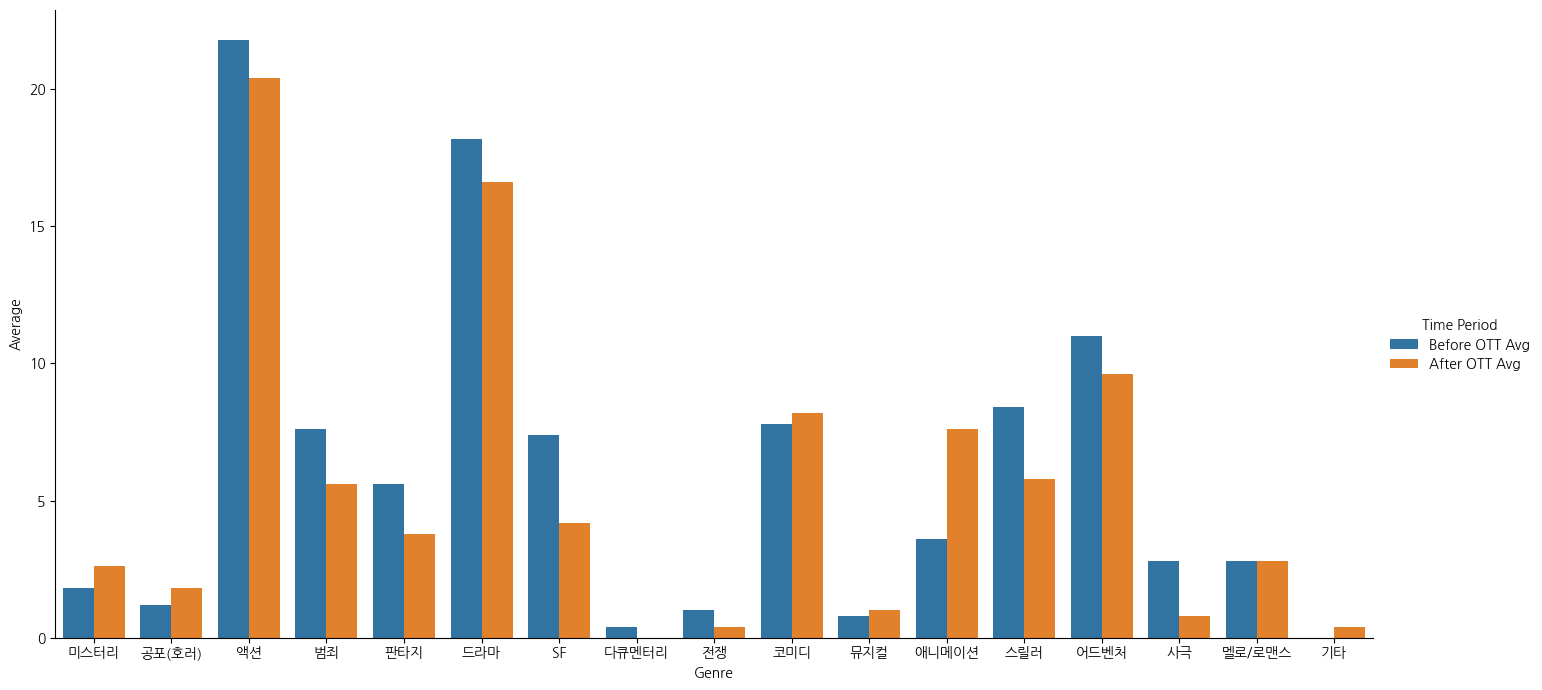

In [18]:
sns.catplot(x="Genre", y="Average", hue="Time Period", data=df_melted, kind="bar", legend=True, height=7, aspect=2)
plt.savefig('bef_aft_each_comparison_bar.png')
plt.show()